## STATISTICHE

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file_groups):
    dataframes = {}
    for group_name, paths in file_groups.items():
        dataframes[group_name] = {}
        for file_type, path in paths.items():
            dataframes[group_name][file_type] = pd.read_csv(path)
    return dataframes

In [3]:
def plot_single_experiment(df, title):
    metrics = ["R2", "Q2", "MSE", "MAE"]
    df = df.set_index("Model")[metrics]
    
    plt.figure(figsize=(10, 6))
    df.plot(kind="bar", rot=45)
    plt.title(title)
    plt.ylabel("Metric Value")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='best')
    plt.show()

In [12]:
def compare_multiple_experiments(dataframes):
    results = {}
    
    for category in ["test", "best", "retrain"]:
        metrics = ["Q2", "MSE", "MAE"] if category == "test" else ["R2", "Q2", "MSE", "MAE"]
        comparison_df = pd.DataFrame()
        model_names = {}
        
        for name, df_dict in dataframes.items():
            df = df_dict[category]
            best_idx = df["Q2"].idxmax() if category == "test" else df["R2"].idxmax()
            best_model = df.loc[best_idx, metrics]
            comparison_df[name] = best_model
            model_names[name] = df.loc[best_idx, "Model"]  # Salva il nome del modello migliore
        
        # Aggiungi i nomi dei modelli alla tabella
        comparison_df.loc["Best Model"] = model_names
        results[category] = comparison_df.T
        
        # Creare un'unica immagine con subplot
        fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 6))
        fig.suptitle(f"Comparison of Metrics Across Experiments ({category})")
        
        if len(metrics) == 1:
            axes = [axes]  # Assicura che axes sia iterabile anche con un solo grafico
        
        for ax, metric in zip(axes, metrics):
            comparison_df.T[metric].plot(kind="bar", rot=45, ax=ax)
            ax.set_title(metric)
            ax.set_ylabel(metric)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    
    return results

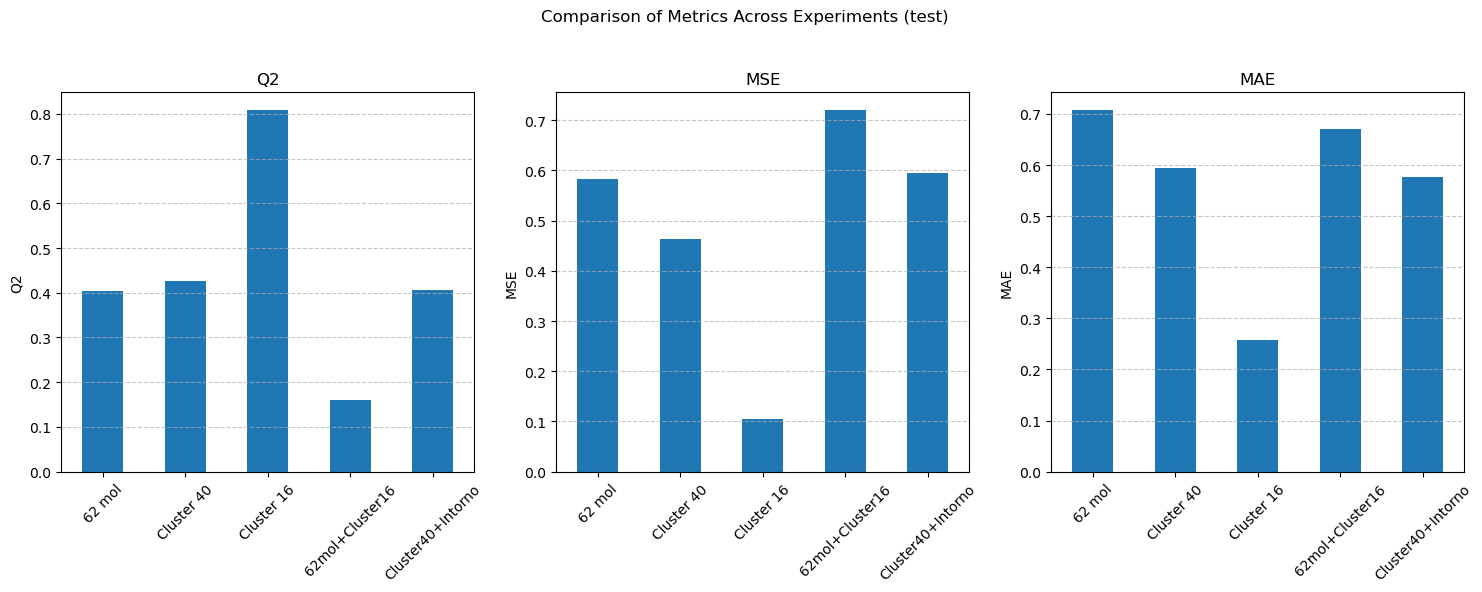

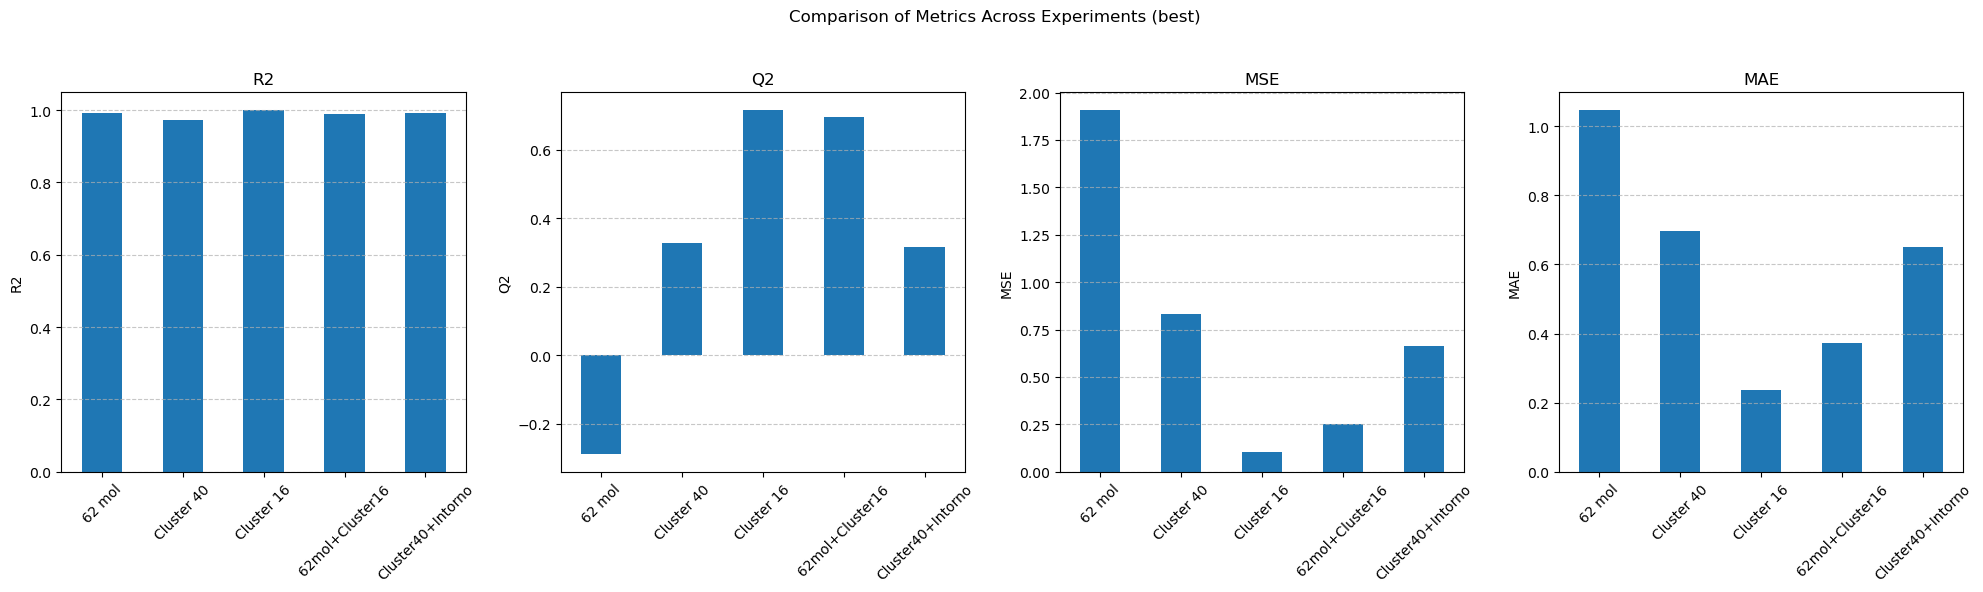

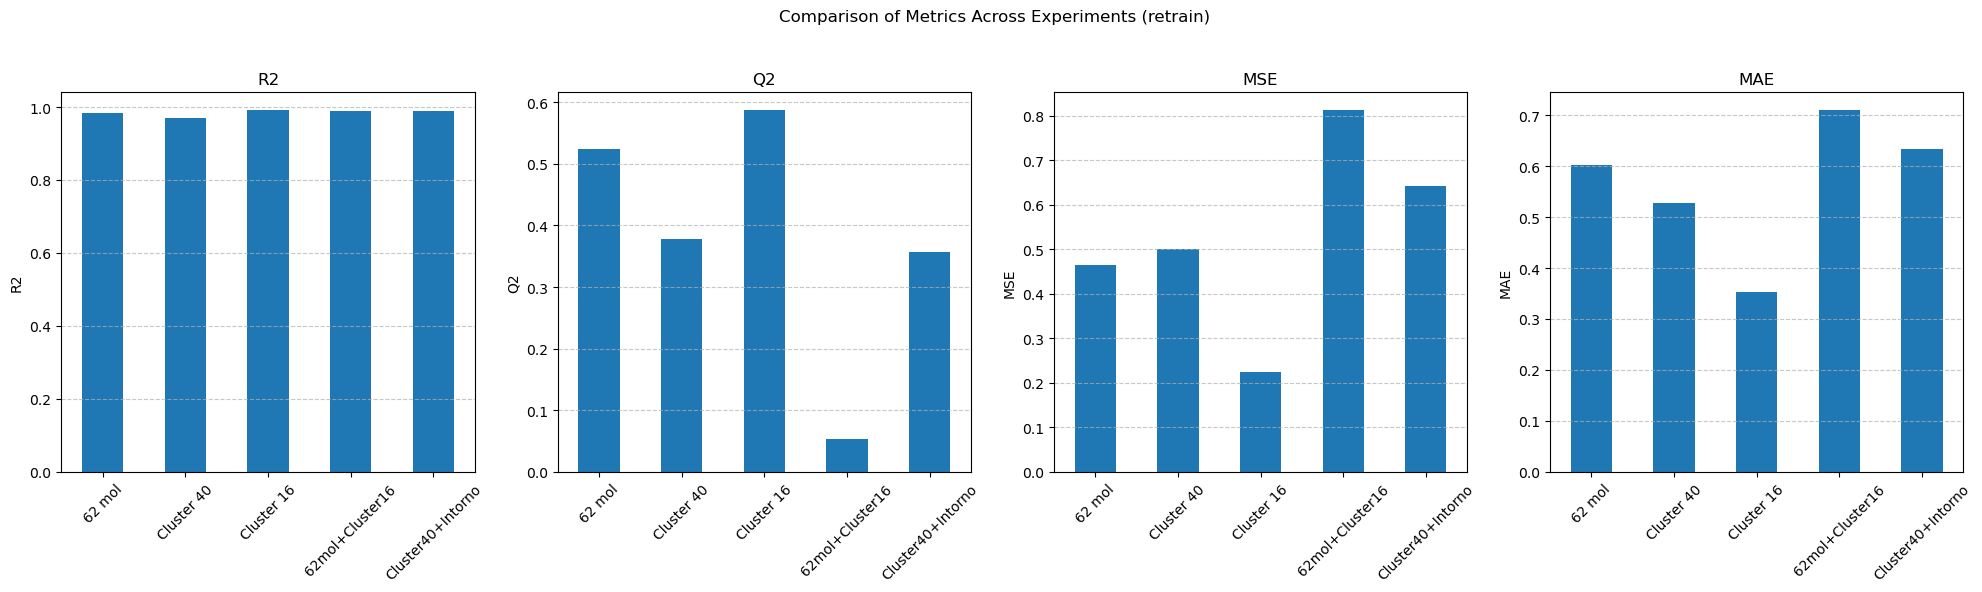

                         Q2       MSE       MAE Best Model
62 mol             0.403722  0.583119  0.706879   AdaBoost
Cluster 40         0.425697  0.463373  0.594663        MLP
Cluster 16         0.807676  0.104647  0.257974        KNN
62mol+Cluster16    0.160788  0.719629  0.671283        SVR
Cluster40+Intorno  0.405538  0.594295  0.577169        SVR
                         R2        Q2       MSE       MAE         Best Model
62 mol              0.99118 -0.289929  1.905765  1.046099  Gradient Boosting
Cluster 40          0.97174  0.328348   0.82936  0.698331            XGBoost
Cluster 16         0.999153  0.716977  0.102142  0.236442           AdaBoost
62mol+Cluster16    0.989365  0.694612  0.253346  0.373633                SVR
Cluster40+Intorno  0.992127  0.314643   0.66513    0.6492            XGBoost
                         R2        Q2       MSE       MAE         Best Model
62 mol             0.983845   0.52435  0.465153  0.603077  Gradient Boosting
Cluster 40         0.969596  0

In [14]:
file_groups = {
    "62 mol": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_62mol/best_retrain.csv"},
    "Cluster 40": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/osimertinib_cluster40/best_retrain.csv"},
    "Cluster 16": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster_16_17/best_retrain.csv"},
    "62mol+Cluster16": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/62mol_cluster16_17/best_retrain.csv"},
    "Cluster40+Intorno": {"test": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/test_results.csv", "best": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/best_model.csv", "retrain": "/home/federica/LAB2/egfr_qsar/qsar_results/cluster40_clusterintorno/best_retrain.csv"}
}
dataframes = load_data(file_groups)
res=compare_multiple_experiments(dataframes)
print(res["test"])
print(res["best"])
print(res["retrain"])

/tmp/ipykernel_106601/2434241495.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


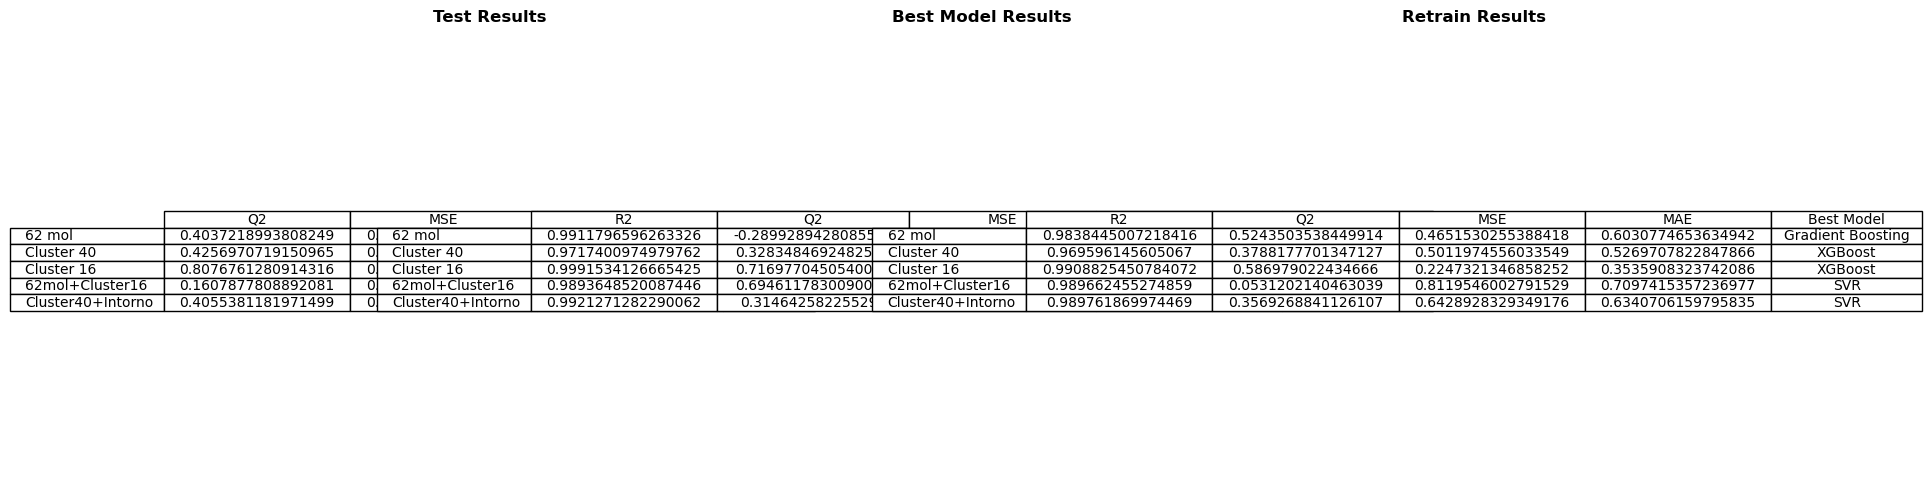

In [15]:
def plot_table(data, title, ax):
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=data.values, colLabels=data.columns, rowLabels=data.index,
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))
    ax.set_title(title, fontweight="bold", fontsize=12)

def plot_results(res):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    plot_table(res["test"], "Test Results", axes[0])
    plot_table(res["best"], "Best Model Results", axes[1])
    plot_table(res["retrain"], "Retrain Results", axes[2])
    
    plt.tight_layout()
    plt.show()
plot_results(res)